Use this reference to label the faces of the cube consistently.

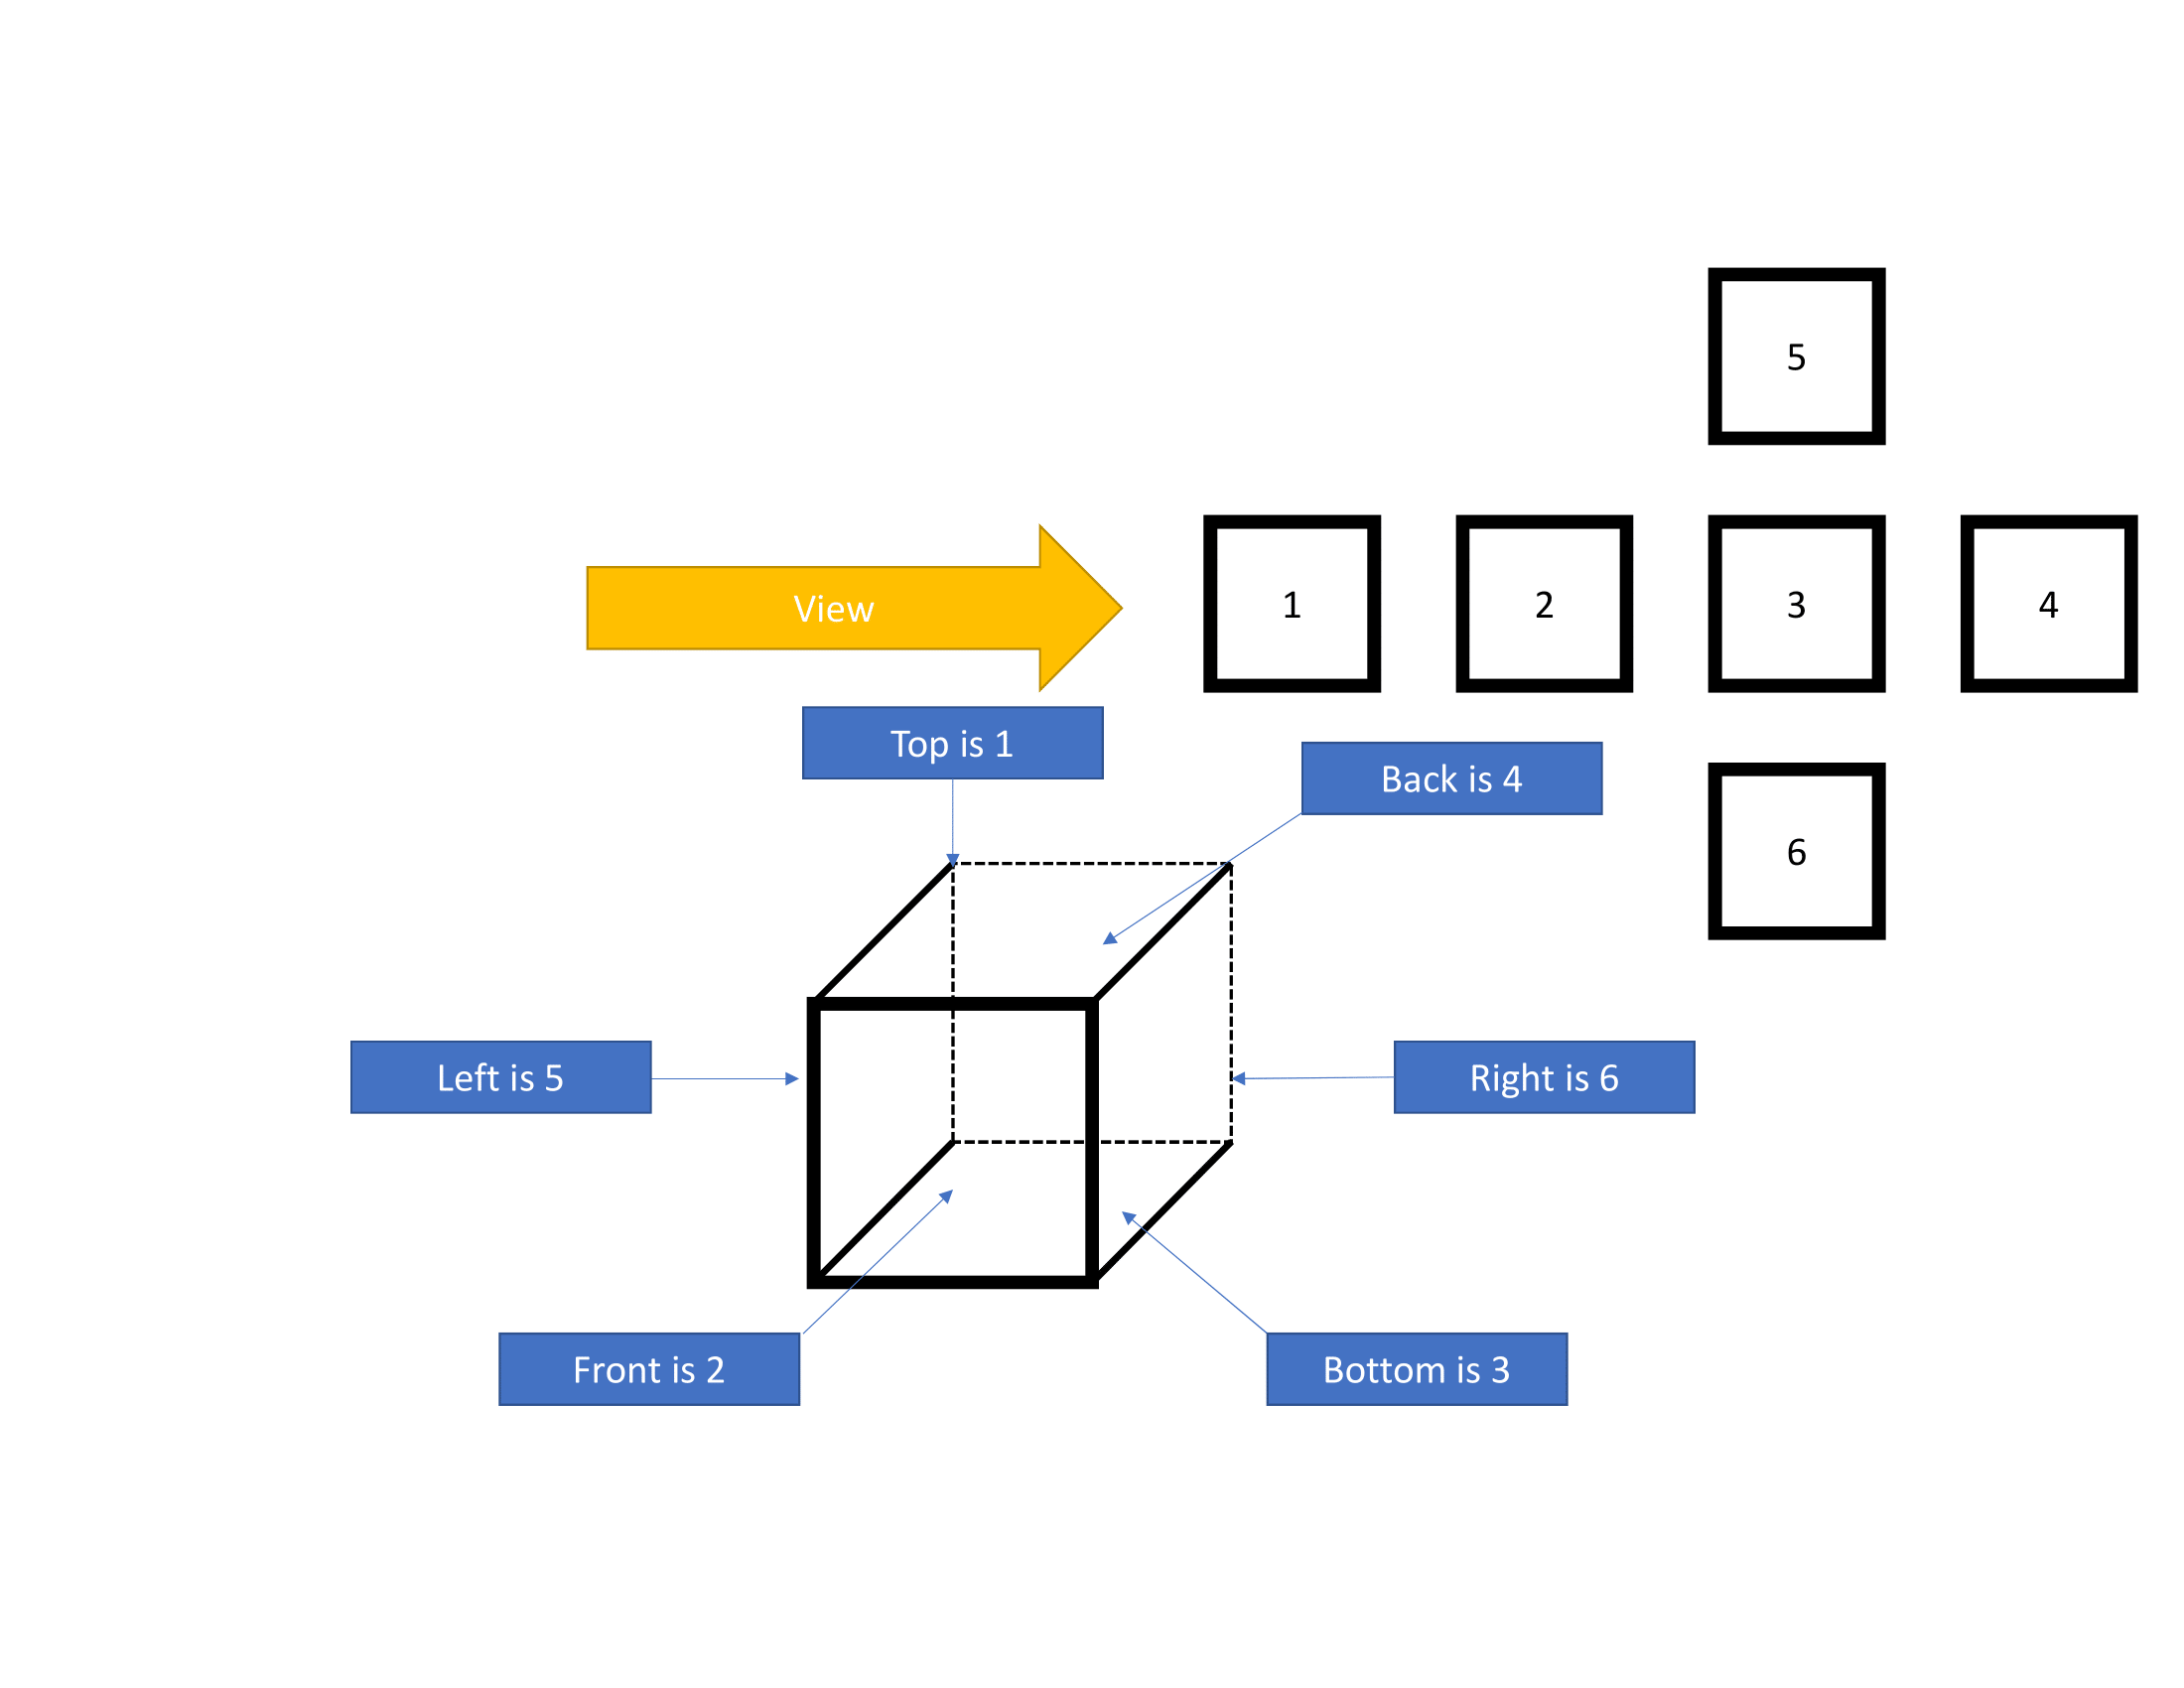


On my cube's current configuration, the faces are colored in the following way (associating a color to a face via middle square):

| Number      | Designation  | Color      |
| :---------- | :----------  |:---------- |
|      1      | Top          | Yellow     |
|      2      | Front        | Green      |
|      3      | Bottom       | White      |
|         4   | Back         | Blue       |
|      5      | Left         | Red        | 
|         6   | Right        | Orange     |

So it makes sense to represent the colors in the same way, i.e. the color 3 corresponds to white, and the "home face" of white is the bottom. 

In [29]:
from copy import deepcopy
from copy import copy

def rotate_face(face, direction):
        #helper function to rotate a face either left or right
        
    old_face = deepcopy(face)    
    if direction == -1:
        #left rotation
                
        #this face is rotating to the left
        
                
        # 1 2 3    3 6 9       
        # 4 5 6    2 5 8   
        # 7 8 9    1 4 7
            
        # index 1 -> 3
        face[0][0] = old_face[0][2]
        # index 2 -> 6
        face[0][1] = old_face[1][2]
        # index 3 -> 9
        face[0][2] = old_face[2][2]
                
        #index 4-> 2
        face[1][0] = old_face[0][1]
        #index 5 -> 5
        #self.top[1][1] = old_top[1][1]
        # index 6 -> 8
        face[1][2] = old_face[2][1]
                
        #index 7 -> 1
        face[2][0] = old_face[0][0]
        #index 8 -> 4
        face[2][1] = old_face[1][0]
        #index 9 -> 7
        face[2][2] = old_face[2][0]
        
    if direction == 1:
        #right rotation
            
        #this face is rotating to the right
            
        # 1 2 3     7 4 1
        # 4 5 6     8 5 2
        # 7 8 9     9 6 3
            
        #index 1 -> 7
        face[0][0] = old_face[2][0]
        #index 2 -> 4
        face[0][1] = old_face[1][0]
        #index 3 -> 1
        face[0][2] = old_face[0][0]
            
        #index 4 -> 8
        face[1][0] = old_face[2][1]
        #index 5 -> 5
        #face[1][1] = old_face[1][1]
        #index 6 -> 2
        face[1][2] = old_face[0][1]
            
        #index 7 -> 9
        face[2][0] = old_face[2][2]
        #index 8 -> 6
        face[2][1] = old_face[1][2]
        #index 9-> 3
        face[2][2] = old_face[0][2]
            
    return face



class cube:
    def __init__(self, top, front, bottom, back, left, right):
        self.top = top
        self.front = front
        self.bottom = bottom
        self.back = back
        self.left = left
        self.right = right
        self.horizontal = [front, right,back,left]
        # spinning right away from me
        self.vertical = [front, top, back, bottom]
        # spinning backwards away from me
        self.total = [top,front,bottom,back,left,right]
        
    def __str__(self):
        return "TOP : " + str(self.top) + "\n" + "FRONT :"  + str(self.front) + "\n" + "BOTTOM :" + str(self.bottom) + "\n" + "BACK :" + str(self.back) + "\n" + "LEFT :" + str(self.left) + "\n" + "RIGHT :" + str(self.right)
        

            
        
    # Moves will be by standard solver terminology
    # I'm not going to be shy about memory usage since it makes things clearer for me and the cube object itself is quite small
        
    def horizontal_rotate(self,position,direction):
        
        # the cube has the front face facing "towards me"
        # position is '0' or '2'. It represents the row of the cube, with 0 being the top, 2 the bottom
        # note that many solving algorithms don't rotate the middle row at all, though its possible to supply that argument here
        # direction is left or right. Since the cube is "spinning right", a right turn is denoted by 1, a left by -1
        
        old_front = copy(self.front[position])
        old_right = copy(self.right[position])
        old_left  = copy(self.left[position])
        old_back  = copy(self.back[position])
        
        
        if direction == 1:
            #rotating towards the right
            
            #right becomes front
            self.right[position] = old_front
            
            #back becomes right
            self.back[position] = old_right
            
            #left becomes back
            self.left[position] = old_back
            
            #front becomes left
            self.front[position] = old_left
            
            if position == 0:
                
                # the top row is moving right. Therefore, the top face is rotating left
                self.top = rotate_face(copy(self.top), -1)
                
            if position == 2:
                # the bottom row is moving right, so the bottom face is rotating left
                self.bottom = rotate_face(copy(self.bottom),-1)
            

                
                
        if direction == -1:
            for j in range(3):
                self.horizontal_rotate(position, 1)

            
        
    def vertical_rotate(self, position, direction):
        
        # same as before. This time, the positions range from 0 (leftmost column) to 2(rightmost column). as before, 
        # the middle column isn't called in most algorithms. But you can still supply it as an argument here by using 1
        # a direction of 1 means the cube is rotating away from me
        # a direction of -1 means the cube is rotating towards me
        
        # needs testing... 1 should work. Myabe -1 as 3 turns like below?
        
        old_front  = [i[position] for i in self.front]
        old_top    = [i[position] for i in self.top]
        old_back   = [i[2-position] for i in self.back]
        old_bottom = [i[position] for i in self.bottom]
        
        if direction == 1:
            
            #top becomes front
            for j in range(len(self.top)):
                self.top[j][position] = old_front[j]
                
            #back becomes top
            for j in range(len(self.back)):
                self.back[j][2-position] = old_top[2-j]
            
            #bottom becomes back
            for j in range(len(self.bottom)):
                self.bottom[2-j][position] = old_back[j]
            
            #front becomes bottom
            for j in range(len(self.front)):
                self.front[j][position] = old_bottom[j]
                
            if position == 0:
                #the leftmost column is moving away from me, so the left face rotates left
                self.left = rotate_face(copy(self.left),-1)
            
            if position == 2:
                #the rightmost column is moving away from me, so the right column rotates right (!)
                self.right = rotate_face(copy(self.right), 1)
                
        
        if direction == -1:
            
            for j in range(3):
                self.vertical_rotate(position, 1)
                
    def front_rotate(self, direction):
        # I made the first two rotate functions without considering an algorithm. But it seems that while
        # middle position moves are often not considered, but this front rotation is instead.
        # this move involves grabbing the entire front face and rotating the entire thing either left or right
        # there is no analogue for grabbing the back face, so only direction needs to be specified
                    
            
        old_top  =   copy(self.top[2])
        old_right    = [i[0] for i in self.right]
        old_left   = [i[2] for i in self.left]
        old_bottom = copy(self.bottom[0])

        if direction == 1:
            # rotating it right
                
            # the leftmost column of right becomes the bottom row of the top
            for j in range(len(self.right)):
                self.right[j][0] = old_top[j]
            # the top row of the bottom becomes the leftmost column of right (in reverse)
            for j in range(len(self.bottom)):
                self.bottom[0][j] = old_right[2-j]
            # the rightmost column of left becomes the top row of bottom
            for j in range(len(self.left)):
                self.left[j][2] = old_bottom[j]
            # the bottom row of top becomes the rightmost column of left (in reverse)
            for j in range(len(self.front)):
                self.top[2][j] = old_left[2-j]
                
            self.front = rotate_face(copy(self.front),1)
            
        if direction == -1:
            for j in range(3):
                self.front_rotate(1)
                                
        
        
solved_cube = cube([
[1,1,1],[1,1,1],[1,1,1]],
[[2,2,2],[2,2,2],[2,2,2]],
[[3,3,3],[3,3,3],[3,3,3]],
[[4,4,4],[4,4,4],[4,4,4]],
[[5,5,5],[5,5,5],[5,5,5]],
[[6,6,6],[6,6,6],[6,6,6]]
)        

my_cube = cube(
[[2,4,5],[2,3,1],[3,2,6]],
[[2,1,4],[2,2,4],[5,1,4]],
[[4,5,6],[6,1,3],[1,1,3]],
[[3,6,6],[4,4,6],[2,4,2]],
[[1,5,6],[3,6,3],[5,2,1]],
[[1,6,4],[5,5,3],[3,5,5]]
)        

my_cube.horizontal_rotate(0,-1)
print(my_cube)



TOP : [[3, 2, 2], [2, 3, 4], [6, 1, 5]]
FRONT :[[1, 6, 4], [2, 2, 4], [5, 1, 4]]
BOTTOM :[[4, 5, 6], [6, 1, 3], [1, 1, 3]]
BACK :[[1, 5, 6], [4, 4, 6], [2, 4, 2]]
LEFT :[[2, 1, 4], [3, 6, 3], [5, 2, 1]]
RIGHT :[[3, 6, 6], [5, 5, 3], [3, 5, 5]]


Currently, the cube can rotate like a normal cube, preserving the stickers and their orientations.

**To come -- a method to turn the cube (to change which face is facing forwards)
**A solution method based on the "white cross" method




In [35]:
solved_cube.vertical_rotate(0,-1)

In [36]:
print(solved_cube.total)

[[[4, 1, 1], [4, 1, 1], [4, 1, 1]], [[1, 2, 2], [1, 2, 2], [1, 2, 2]], [[2, 3, 3], [2, 3, 3], [2, 3, 3]], [[3, 4, 4], [3, 4, 4], [3, 4, 4]], [[5, 5, 5], [5, 5, 5], [5, 5, 5]], [[6, 6, 6], [6, 6, 6], [6, 6, 6]]]


In [19]:
solved_cube.horizontal_rotate(0,-1)

In [23]:
t = [[1,2,3],[1,2,3],[1,2,3]]
right = [a[2] for a in t]
right


[3, 3, 3]